## Curso de Inteligencia Artificial

### API de Scikit-Learn



**Versiones a utilizar**

In [1]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

Python version: 3.11.3 (tags/v3.11.3:f3909b8, Apr  4 2023, 23:49:59) [MSC v.1934 64 bit (AMD64)]
pandas version: 2.0.1
matplotlib version: 3.7.1
NumPy version: 1.24.3
SciPy version: 1.10.1
IPython version: 8.14.0
scikit-learn version: 1.2.2


## API de scikit-learn

Los principales "interfaces" en scikit-learn son (una clase puede implementar múltiples interfaces):

- **Estimador**: 

    `estimador = obj.fit(data, targets)` 
    
- **Predictor**:

    `prediccion = obj.predict(data)` 
    
- **Transformador**:

    `n_data = obj.transform(data)` 
    
- **Modelo**:

    `s = obj.score(data)`


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
# Ejemplos
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from numpy import logical_or
from sklearn.linear_model import LogisticRegression
import sgd_separador 
import regresion 

### Completar

from sklearn import datasets
from numpy import logical_or
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
subconjunto = logical_or(iris.target == 0, iris.target == 1)

X= iris.data[subconjunto]
y=iris.target[subconjunto]

#creacion del modelo

modelo= LogisticRegression()

#fijamos el modelo

modelo.fit(X,y)
print(modelo.coef_)

[[ 0.44036482 -0.90696813  2.30849566  0.96232763]]


In [14]:
# Para aprendizaje no supervisado
from sklearn.cluster import KMeans

# Creamos el modelo
KMeans= KMeans(n_clusters=2)

# Fijamos el modelo
KMeans.fit(X)
print(KMeans.cluster_centers_)

[[5.936 2.77  4.26  1.326]
 [5.006 3.428 1.462 0.246]]


In [15]:
# Reduccion de la dimension

from sklearn.decomposition import PCA

# Creamos el modelo
pca = PCA(n_components=2)

# Fijamos el modelo
pca.fit(X)
print (pca.explained_variance_)

[2.77191092 0.22795013]


In [16]:
# Predictores
modelo = LogisticRegression()
modelo.fit(X, y)

X_test = [[ 5.006,  3.418,  1.464,  0.244], [ 5.936,  2.77 ,  4.26 ,  1.326]]
modelo.predict(X_test)

array([0, 1])

In [17]:
print (modelo.predict_proba(X_test))

[[0.98001834 0.01998166]
 [0.00994894 0.99005106]]


In [18]:
# Ejemplo más avanzado de SVM,  usando SVC (support vector classification)

from sklearn import svm
digitos = datasets.load_digits()
clasificador = svm.SVC(gamma=0.001, C=100.)

# Fijamos el modelo
clasificador.fit(digitos.data[:-1], digitos.target[:-1])  

# Usamos los predictores en el modelo
clasificador.predict(digitos.data[-1:])


array([8])

In [19]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X_train)
#Xtrain = scaler.fit(X_train)

#X_test =scaler.transform(X_test)



NameError: name 'X_train' is not defined

In [20]:
# El metodo transform para aprendizaje no supervisado

pca = PCA(n_components=2)
pca.fit(X)

print (pca.transform(X)[0:5,:])

[[-1.6534434   0.19872334]
 [-1.6324908  -0.30649923]
 [-1.8183021  -0.27991275]
 [-1.65968123 -0.43813423]
 [-1.70289234  0.20759772]]


In [21]:
# El metodo fit.transform

pca = PCA(n_components=2)
print (pca.fit_transform(X)[0:5,:])


[[-1.6534434   0.19872334]
 [-1.6324908  -0.30649923]
 [-1.8183021  -0.27991275]
 [-1.65968123 -0.43813423]
 [-1.70289234  0.20759772]]


In [22]:
# Otros modelos
# Utilizamos DummyClassifier un clasificador que hace predicciones simples

from sklearn.dummy import DummyClassifier

modelo = DummyClassifier()
modelo.fit(X, y)

modelo.score(X, y)


0.5

Dos de las tareas más simples del aprendizaje automático es la `clasificación` y la `regresión`. Veamos el siguiente ejemplo:

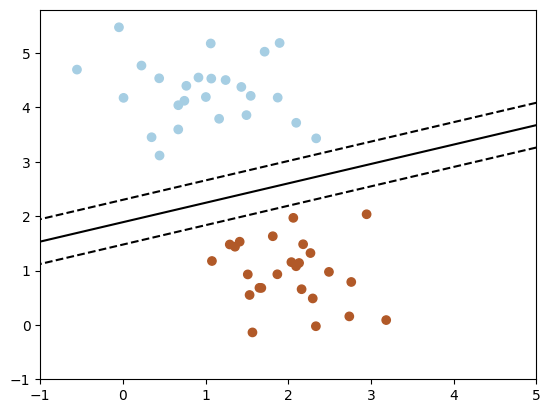

In [23]:
%run sgd_separador.py

Otra tarea del aprendizaje automático es la de `regressión`, que es el ajuste de una línea a un conjunto de datos.

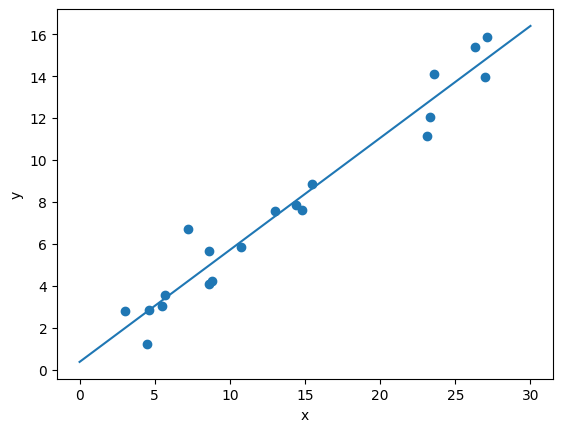

In [24]:
%run regresion.py

###  Validación de modelos


In [25]:
# Para el conjunto de datos iris, la prediccion de los datos de entrada

from sklearn.neighbors import KNeighborsClassifier
X, y = iris.data, iris.target
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X)
print(np.all(y == y_pred))

True


Una forma más útil examinar los resultados es  ver la `matriz de confusión (confusión matrix)`, o la matriz que muestra la frecuencia de las entradas y salidas:

In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [35]:
from sklearn.model_selection import train_test_split

Xentrenamiento, Xtest, yentrenamiento, ytest = train_test_split(X, y)
clf.fit(Xentrenamiento, yentrenamiento)
ypred = clf.predict(Xtest)
print(confusion_matrix(ytest, ypred))

[[12  0  0]
 [ 0 16  1]
 [ 0  1  8]]


Esto muestra verdadero rendimiento de nuestro clasificador

Por esta razón, es muy importante utilizar  los datos de  `entrenamiento` y datos `test` en la evaluación de los  modelos. 

#### Ejercicios de experimentación

1 . Carga el conjunto de datos ``diabetes`` usando ``sklearn.datasets.load_diabetes`` y realiza un análisis de acuerdo a las notas realizadas. Aplica ``LinearRegression``, ``Ridge`` y ``Lasso``  y visualiza los coeficientes.

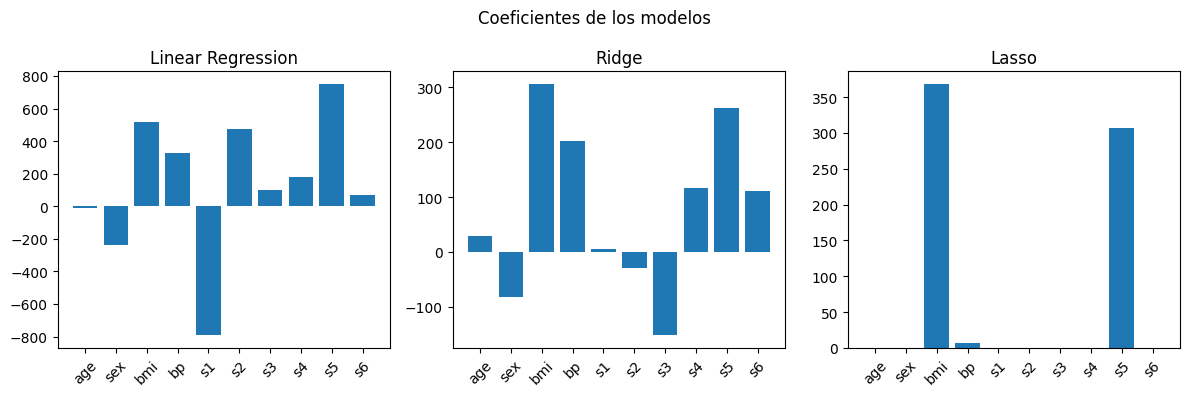

In [36]:
### Tu respuesta
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np
import matplotlib.pyplot as plt

# Cargar el conjunto de datos "diabetes"
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Crear instancias de los modelos de regresión lineal, Ridge y Lasso
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

# Ajustar los modelos a los datos y obtener los coeficientes
lr.fit(X, y)
ridge.fit(X, y)
lasso.fit(X, y)

# Visualizar los coeficientes de cada modelo
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Coeficientes de los modelos')

# Coeficientes de LinearRegression
ax[0].bar(range(len(diabetes.feature_names)), lr.coef_)
ax[0].set_xticks(range(len(diabetes.feature_names)))
ax[0].set_xticklabels(diabetes.feature_names, rotation=45)
ax[0].set_title('Linear Regression')

# Coeficientes de Ridge
ax[1].bar(range(len(diabetes.feature_names)), ridge.coef_)
ax[1].set_xticks(range(len(diabetes.feature_names)))
ax[1].set_xticklabels(diabetes.feature_names, rotation=45)
ax[1].set_title('Ridge')

# Coeficientes de Lasso
ax[2].bar(range(len(diabetes.feature_names)), lasso.coef_)
ax[2].set_xticks(range(len(diabetes.feature_names)))
ax[2].set_xticklabels(diabetes.feature_names, rotation=45)
ax[2].set_title('Lasso')

plt.tight_layout()
plt.show()

